# Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_sms = pd.read_csv('sms_spam_collection.csv')

In [ ]:
df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Text Preprocessing 1

Method :
1. converting to lower case
1. contraction
1. remove or convert number into text
1. remove punctuation
1. remove white spaces
1. remove stopwords and particular words

> ## Converting to lower case

In [ ]:
def to_lower(text):
    return text.lower()

In [ ]:
text_string = "Summer December 10th 2019 "
text_string = to_lower(text_string)
print(text_string)

summer december 10th 2019 


> ## Contraction

- I’ve done it → I have done it 
- I’m here → I am here
- You’re smart → You are smart


In [ ]:
import re

In [ ]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [ ]:
text_string = "If I ain't got you"
text_string = main_contraction(text_string)
print(text_string)

If I am not got you


> ## Remove or Convert Number Into Text

In [ ]:
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [ ]:
text_string = "I was born in 1996"
text_string = remove_numbers(text_string)
print(text_string)

I was born in 


> ## Remove Punctuation

In [ ]:
from string import punctuation

In [ ]:
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

In [ ]:
text_string = "There was bobby, alex, fergie and I"
text_string = remove_punct(text_string)
print(text_string)

There was bobby alex fergie and I


> ## Remove White Spaces

In [ ]:
def to_strip(text):
    return " ".join(text.split())

In [ ]:
text_string = "There   was      bobby, alex, fergie and I"
text_string = to_strip(text_string)
print(text_string)

There was bobby, alex, fergie and I


> ## Remove Stop Words and Particular Words

Stopwords are words that occur too often and do not provide any additional insight
<br>
Stopwords example:
I, me, myself, we, our, ourselves, you, yourself, ….. 


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [ ]:
text_string = "There was bobby, alex, fergie and I"
text_string = remove_stopwords(text_string)
print(text_string)

There bobby , alex , fergie I


> ## Combine Preprocessing Method

In [ ]:
pd.options.display.max_colwidth = None

In [ ]:
df_sms['message_prep1'] = df_sms['message'].apply(to_lower)
df_sms['message_prep2'] = df_sms['message_prep1'].apply(main_contraction)
df_sms['message_prep3'] = df_sms['message_prep2'].apply(remove_numbers)
df_sms['message_prep4'] = df_sms['message_prep3'].apply(remove_punct)
df_sms['message_prep5'] = df_sms['message_prep4'].apply(to_strip)
df_sms['message_prep6'] = df_sms['message_prep5'].apply(remove_stopwords)

df_sms

,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&cs apply 08452810075over18s,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&cs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,nah i do not think he goes to usf he lives around here though,nah think goes usf lives around though
...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the £750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the £750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the nd time we have tried contact u. u have won the £ pound prize. claim is easy, call now! only p per minute. bt-national-rate.",this is the nd time we have tried contact u u have won the £ pound prize claim is easy call now only p per minute btnationalrate,this is the nd time we have tried contact u u have won the £ pound prize claim is easy call now only p per minute btnationalrate,nd time tried contact u u £ pound prize claim easy call p per minute btnationalrate
5568,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home,will ü b going to esplanade fr hom

# Text Preprocessing 2

> ## Stemming

The process of transforming to the root word.
For example you have caring, cares, cared, caringly carefully then you want to consider them as the same words “care”.
We need stemming because treating them as the same words will reduce overfitting.

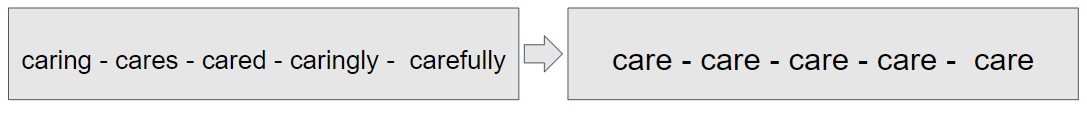

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
snowball_stemmer = SnowballStemmer('english')

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

In [ ]:
text_string = "i am reading a book and the book is very fascinating"
text_string = stem(text_string)
print(text_string)

i am read a book and the book is veri fascin


> ## Lemmatization

The process of transforming to the dictionary base form.
caring, cares, cared, caringly carefully will be transformed into care, care, care caringly carefully.
caringly and carefully are listed in the dictionary.
purpose of lemmatization is also to reduce overfitting.

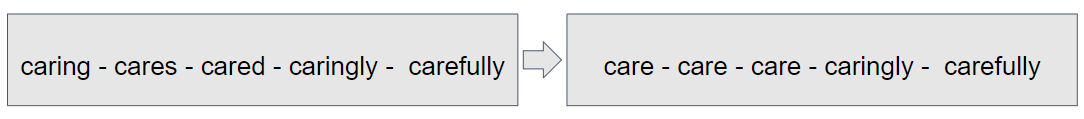

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

In [ ]:
text_string = "there she goes. Here I am"
text_string = lemmatize(text_string)
print(text_string)

there she go . Here I am


> ## Apply Stemming or Lemmatization 

In [ ]:
df_sms['message_prep_stem'] = df_sms['message_prep6'].apply(stem)
df_sms['message_prep_lemma'] = df_sms['message_prep6'].apply(lemmatize)

df_sms[['message_prep_stem','message_prep_lemma']]

,message_prep_stem,message_prep_lemma
0,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ok lar joke wif u oni,ok lar joking wif u oni
2,free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli over,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
3,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,nah think goe usf live around though,nah think go usf life around though
...,...,...
5567,nd time tri contact u u £ pound prize claim easi call p per minut btnationalr,nd time tried contact u u £ pound prize claim easy call p per minute btnationalrate
5568,ü b go esplanad fr home,ü b going esplanade fr home
5569,piti mood soani suggest,pity mood soany suggestion
5570,guy bitch act like interest buy someth els next week gave us free,guy bitching acted like interested buying something else next week gave u free


# Text Exploration

> ## Word Freq

Can be used to identify whether there are still words frequently occur but not meaningful


In [ ]:
import seaborn as sns

In [ ]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus

In [ ]:
kamus_unclean = kamus(df_sms['message_prep_lemma'])

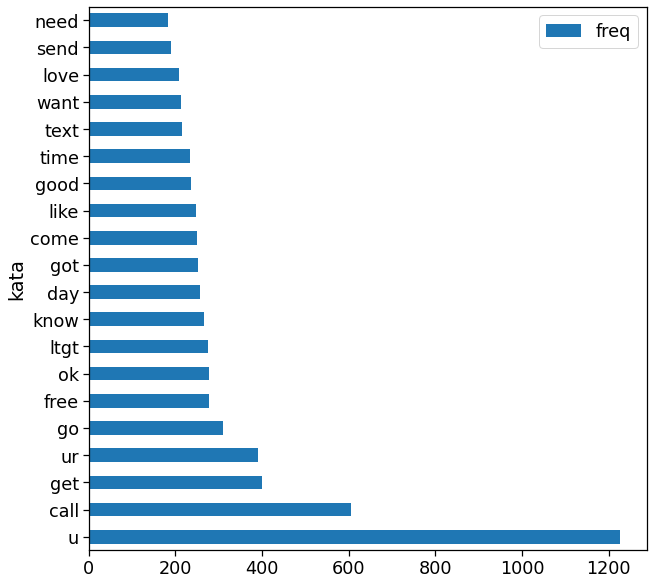

In [ ]:
sns.set_context(context = 'notebook', font_scale = 1.6)
kamus_unclean[:20].plot(kind = 'barh',figsize = (10,10))

> ## Word Cloud

Can be used to identify whether there are still words frequently occur but not meaningful
Can be used as comparison


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

In [ ]:
word_cloud = WordCloud().generate(str(df_sms['message_prep_lemma']))

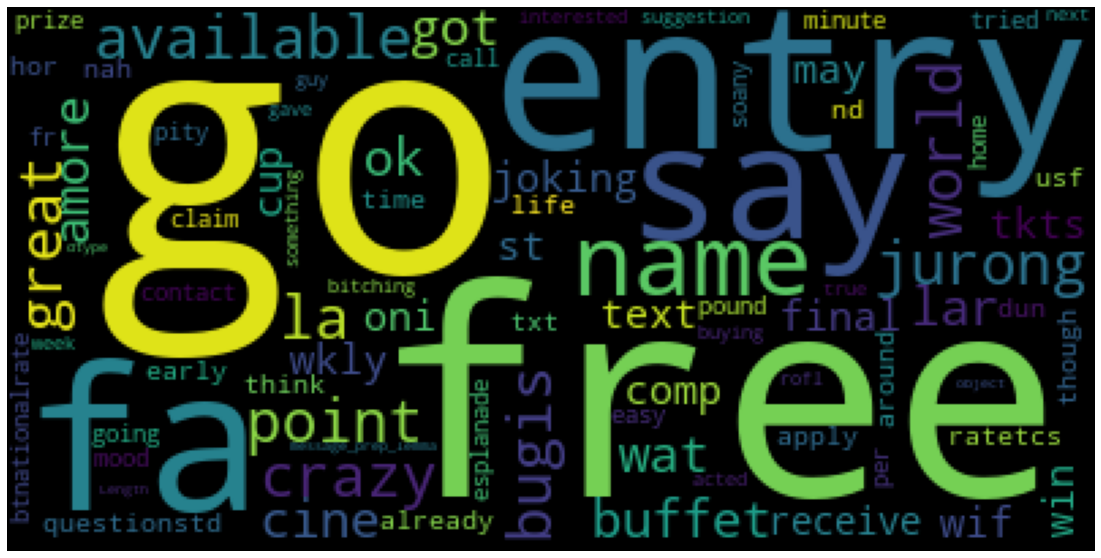

In [ ]:
plot_cloud(word_cloud)

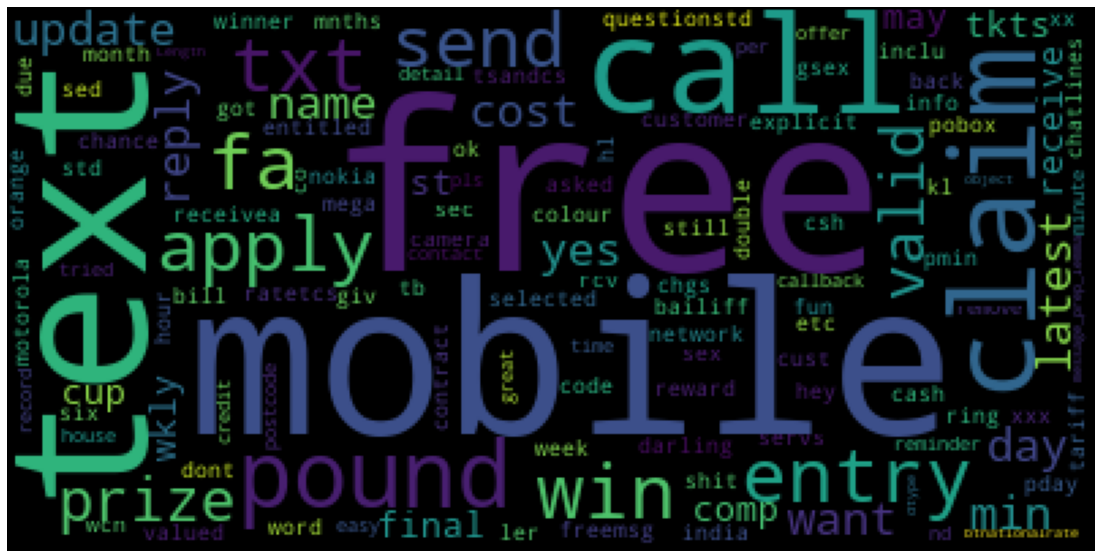

In [ ]:
word_cloud = WordCloud().generate(str(df_sms[df_sms['label'] == 'spam']['message_prep_lemma']))
plot_cloud(word_cloud)

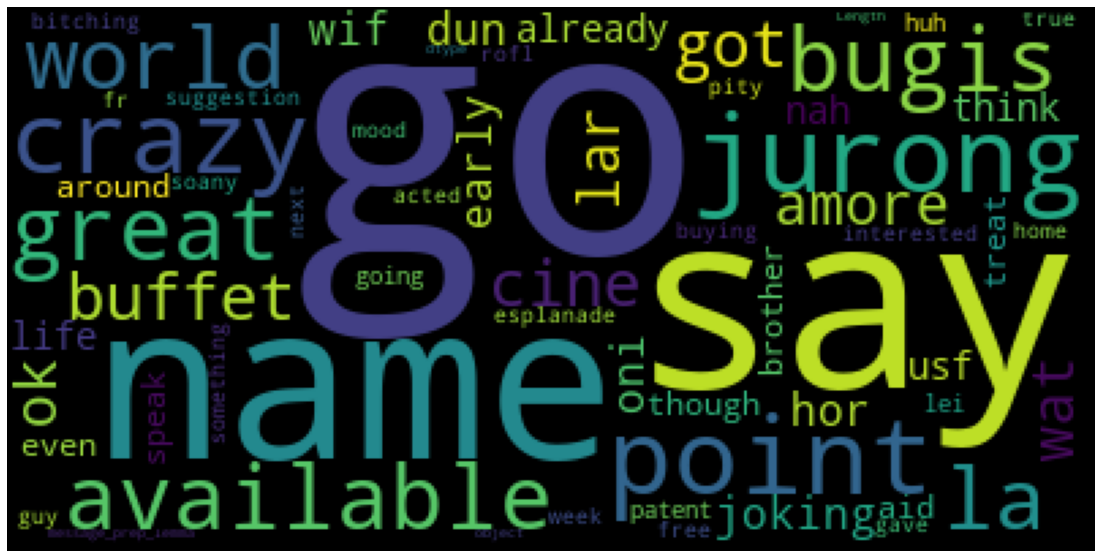

In [ ]:
word_cloud = WordCloud().generate(str(df_sms[df_sms['label'] == 'ham']['message_prep_lemma']))
plot_cloud(word_cloud)

> ## Word Cloud 2

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
mask = np.array(Image.open('comment.png'))

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = stopwords.words('english'), mask=mask).generate(str(df_sms['message_prep_lemma']))

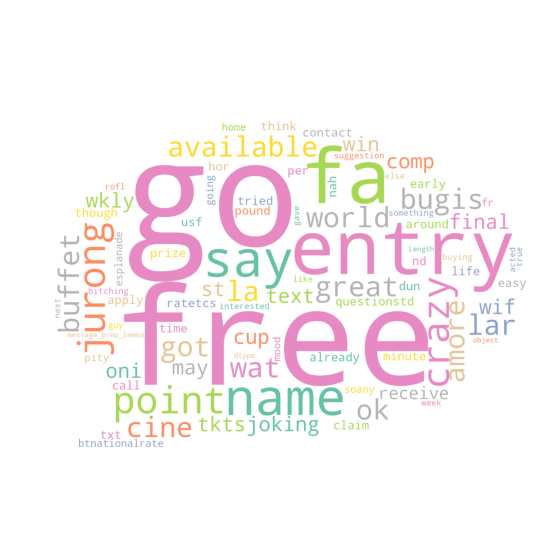

In [ ]:
plot_cloud(wordcloud)

SPAM

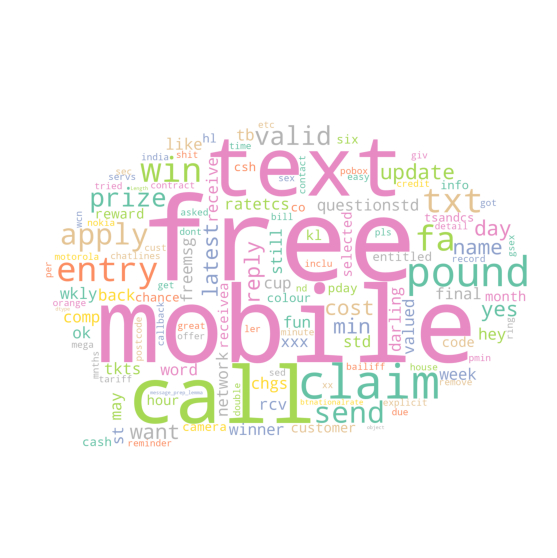

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = stopwords.words('english'), mask=mask).generate(str(df_sms[df_sms['label']=='spam']['message_prep_lemma']))
plot_cloud(wordcloud)

NON-SPAM

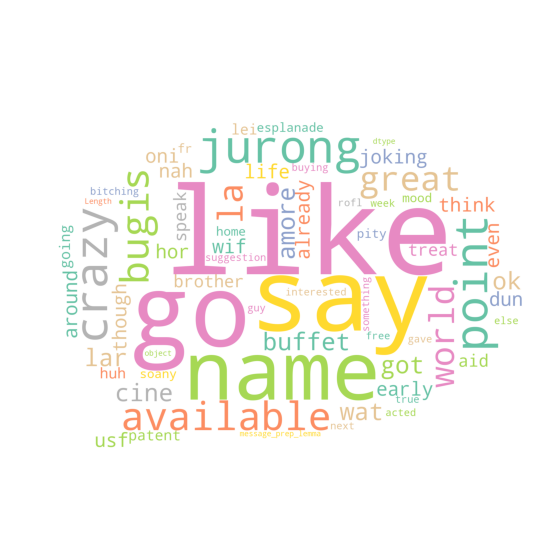

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = stopwords.words('english'), mask=mask).generate(str(df_sms[df_sms['label']=='ham']['message_prep_lemma']))
plot_cloud(wordcloud)

> ## Length of Sentence

In identify what can differ between spam and non-spam we can utilize another content such as length of the character


In [ ]:
import seaborn as sns

In [ ]:
df_sms['length'] = df_sms['message'].apply(len) 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


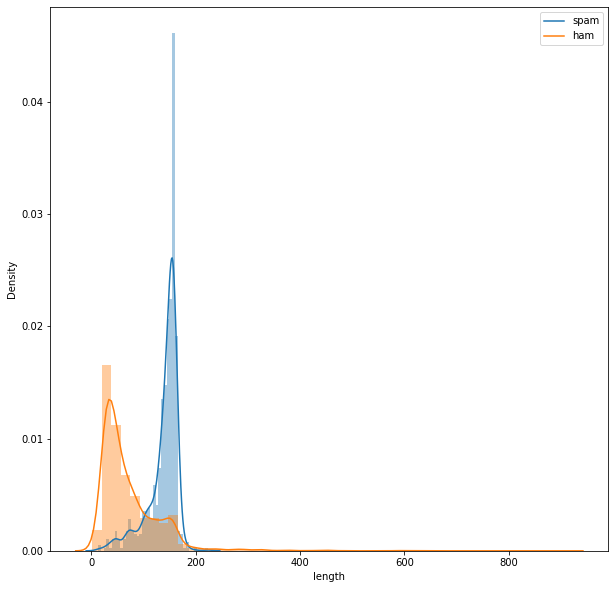

In [ ]:
plt.figure(figsize = (10,10))

df_sms_spam = df_sms[df_sms['label'] == 'spam']
df_sms_ham = df_sms[df_sms['label'] == 'ham']

sns.distplot(df_sms_spam['length'])
sns.distplot(df_sms_ham['length'])

plt.legend(['spam','ham'])

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


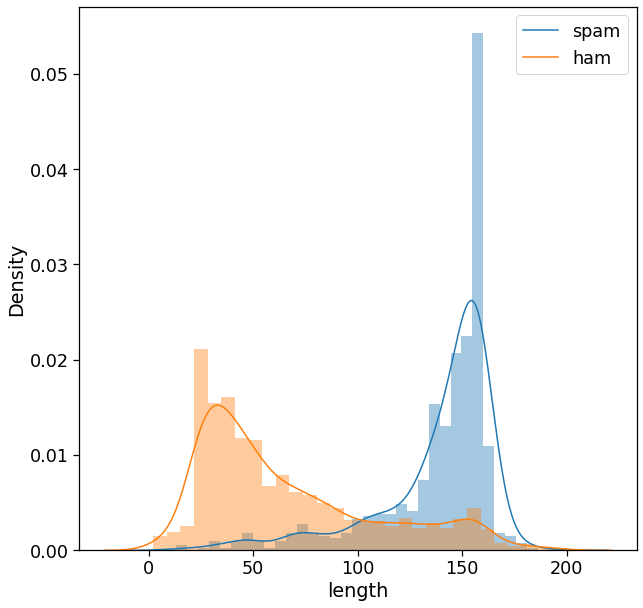

In [ ]:
plt.figure(figsize = (10,10))

df_sms2 = df_sms[df_sms['length'] < 200] 
df_sms_spam = df_sms2[df_sms2['label'] == 'spam']
df_sms_ham = df_sms2[df_sms2['label'] == 'ham']

sns.distplot(df_sms_spam['length'])
sns.distplot(df_sms_ham['length'])

plt.legend(['spam','ham'])

plt.show()

# Document Term Matrix

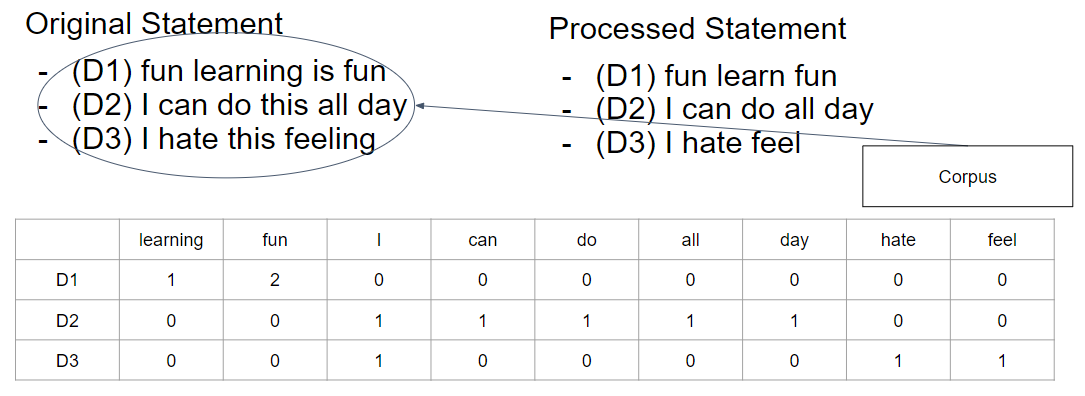

> ## Term Frequency (TF)

- Frequency term in the document
- i.e. if the word appears twice, the frequency in the vector will be 2
- (D1) fun learning is fun


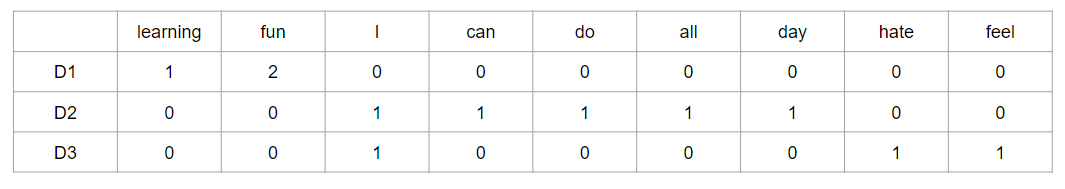

In [ ]:
words_example = ["You already know me, don't you ?",
                 "I am the best there is"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer()
vect.fit(words_example)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_)

vocabulaary size: 10
vocabulaary content:
 {'you': 9, 'already': 0, 'know': 5, 'me': 6, 'don': 3, 'am': 1, 'the': 7, 'best': 2, 'there': 8, 'is': 4}


In [ ]:
dtm = vect.transform(words_example)

In [ ]:
dtm.toarray()

array([[1, 0, 0, 1, 0, 1, 1, 0, 0, 2],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]])

In [ ]:
vect.get_feature_names()

['already', 'am', 'best', 'don', 'is', 'know', 'me', 'the', 'there', 'you']

In [ ]:
dtm = pd.DataFrame(dtm.toarray(), 
                               columns = vect.get_feature_names())

In [ ]:
words_example

["You already know me, don't you ?", 'I am the best there is']

In [ ]:
dtm

,already,am,best,don,is,know,me,the,there,you
0,1,0,0,1,0,1,1,0,0,2
1,0,1,1,0,1,0,0,1,1,0


> ## Term Frequency (TF) - N-grams

Bag of words ignore word order completely.
<br>
These two sentences will have the same tokenization.
- It’s bad, not good at all
- It’s good, not bad at all




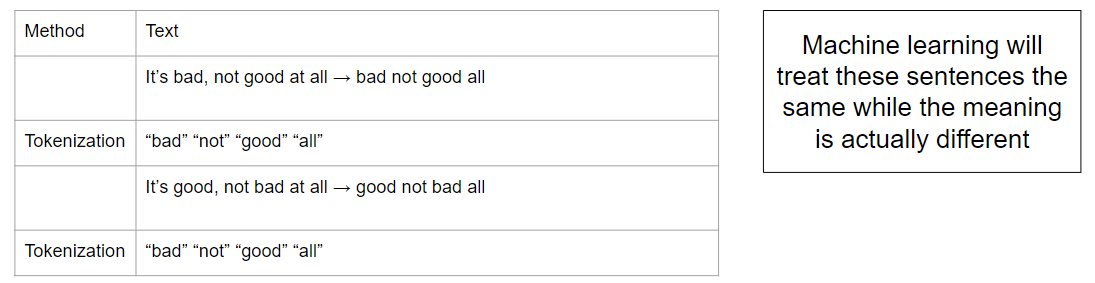

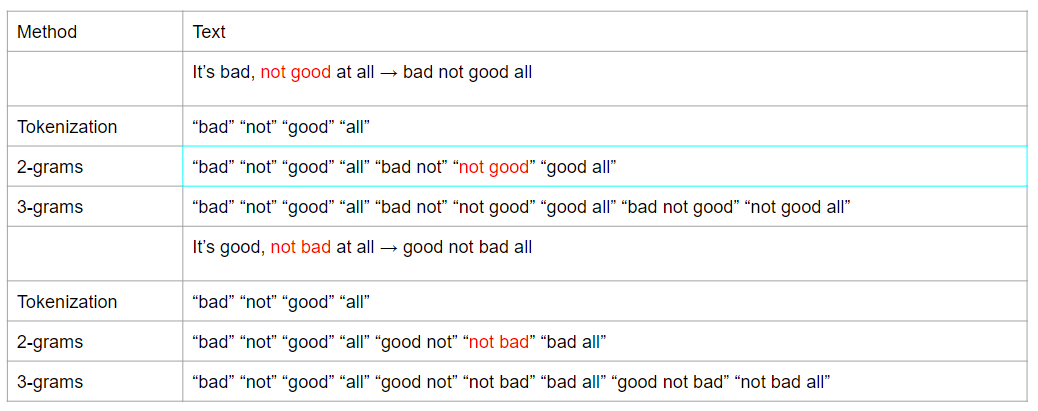

In [ ]:
words_example = ["You already know me, don't you ?",
                 "I am the best there is"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(ngram_range = (1,2))
vect.fit(words_example)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_)

vocabulaary size: 19
vocabulaary content:
 {'you': 17, 'already': 0, 'know': 9, 'me': 11, 'don': 6, 'you already': 18, 'already know': 1, 'know me': 10, 'me don': 12, 'don you': 7, 'am': 2, 'the': 13, 'best': 4, 'there': 15, 'is': 8, 'am the': 3, 'the best': 14, 'best there': 5, 'there is': 16}


In [ ]:
dtm = vect.transform(words_example)

In [ ]:
dtm.toarray()

array([[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]])

In [ ]:
vect.get_feature_names()

['already',
 'already know',
 'am',
 'am the',
 'best',
 'best there',
 'don',
 'don you',
 'is',
 'know',
 'know me',
 'me',
 'me don',
 'the',
 'the best',
 'there',
 'there is',
 'you',
 'you already']

In [ ]:
dtm = pd.DataFrame(dtm.toarray(), 
                               columns = vect.get_feature_names())

In [ ]:
words_example

["You already know me, don't you ?", 'I am the best there is']

In [ ]:
dtm

,already,already know,am,am the,best,best there,don,don you,is,know,know me,me,me don,the,the best,there,there is,you,you already
0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,2,1
1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0


> ## Term Frequency - Inverse Document Frequency (TF-IDF) 

rescale features by how informative we expect them to be.
give high weight to any term appear often in particular document, not in many documents.
tfidf(word, doc) = tf(word) log((N+1)/(Nw+1)) + 1, with 
- tf(word, doc) : term freq of certain word of document
- Nw : number of doc where the words appear
- N : number of doc in training set


TF-IDF Calculation
<br>
tfidf(word, doc) = tf(word,doc) log((N+1)/(Nw+1)) + 1, with
- tfidf for word learning and document D1
- N = 3, Nw = 1, tf(learning,D1) = 1
- tfidf(learning, D1) =  1 log(4/2) + 1 = 1.693	


Original Statement
- (D1) fun learning is fun
- (D2) I can do this all day
- (D3) I hate this feeling


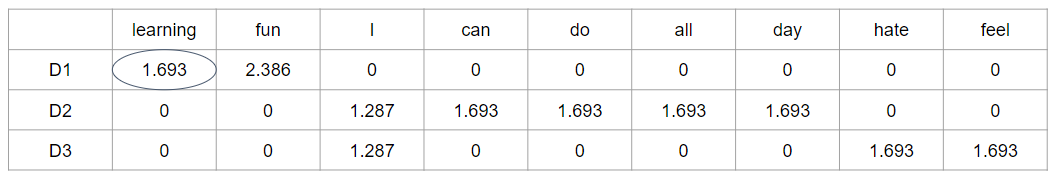

In [ ]:
words_example = ["You already know me, don't you ?",
                 "I am the best there is"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer()
vect.fit(words_example)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_)

vocabulaary size: 10
vocabulaary content:
 {'you': 9, 'already': 0, 'know': 5, 'me': 6, 'don': 3, 'am': 1, 'the': 7, 'best': 2, 'there': 8, 'is': 4}


In [ ]:
dtm_tf_idf = vect.transform(words_example)

In [ ]:
dtm_tf_idf.toarray()

array([[0.35355339, 0.        , 0.        , 0.35355339, 0.        ,
        0.35355339, 0.35355339, 0.        , 0.        , 0.70710678],
       [0.        , 0.4472136 , 0.4472136 , 0.        , 0.4472136 ,
        0.        , 0.        , 0.4472136 , 0.4472136 , 0.        ]])

In [ ]:
vect.get_feature_names()

['already', 'am', 'best', 'don', 'is', 'know', 'me', 'the', 'there', 'you']

In [ ]:
dtm_tf_idf = pd.DataFrame(dtm_tf_idf.toarray(), 
                               columns = vect.get_feature_names())

In [ ]:
dtm_tf_idf

,already,am,best,don,is,know,me,the,there,you
0,0.353553,0.000000,0.000000,0.353553,0.000000,0.353553,0.353553,0.000000,0.000000,0.707107
1,0.000000,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.447214,0.447214,0.000000


> ## Make DTM

### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 text = df_sms['message_prep_lemma']
 y = np.where(df_sms['label'] == 'spam',1,0)

In [ ]:
text_train, text_test, y_train, y_test = train_test_split(text, y)

### fit and transform method

In [ ]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

### DTM atributes

In [ ]:
print('X_train size:\n', repr(X_train))
print('X_test size:\n', repr(X_test))

X_train size:
 <4179x6860 sparse matrix of type '<class 'numpy.int64'>'
	with 33284 stored elements in Compressed Sparse Row format>
X_test size:
 <1393x6860 sparse matrix of type '<class 'numpy.int64'>'
	with 9801 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names = vect.get_feature_names()

In [ ]:
print('number of features:', len(feature_names))
print('first 10 features:\n', feature_names[:10])
print('last 10 features:\n', feature_names[-10:])

number of features: 6860
first 10 features:
 ['aah', 'aaniye', 'aathilove', 'aathiwhere', 'abdomen', 'abeg', 'abelu', 'aberdeen', 'abi', 'ability']
last 10 features:
 ['zero', 'zf', 'zhong', 'zindgi', 'zoe', 'zogtorius', 'zouk', 'zyada', 'üll', '〨ud']


# Text Classification

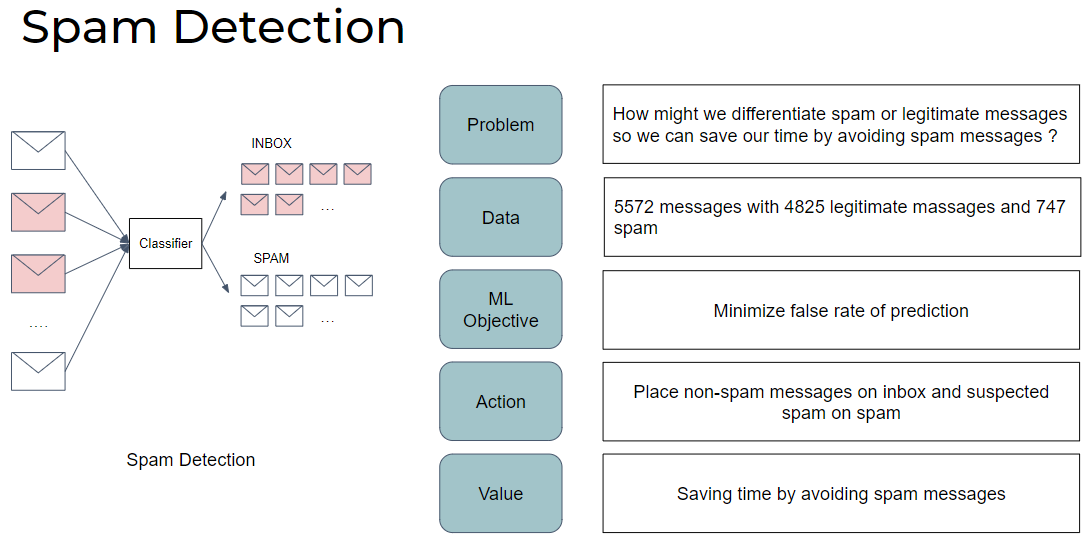

> ## Modeling Benchmark

You can use some algo you already learned
- Logistic Regression
- RF
- Boosting, etc

<br>

There are another method such as
- Naive Bayes
- Support Vector Classifier (SVC)
- Deep Learning


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1198
           1       0.98      0.86      0.92       195

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



> ## Modeling TF-IDF

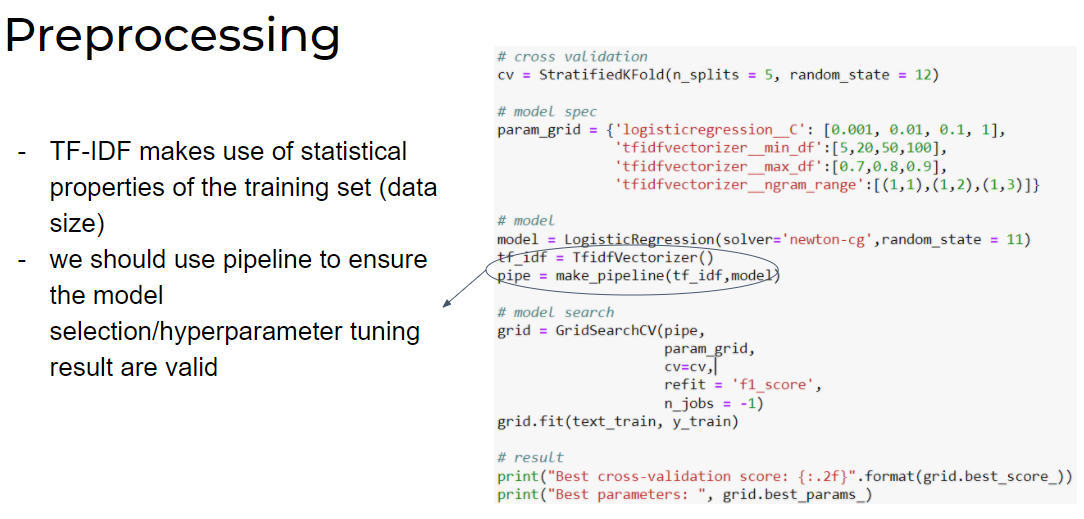

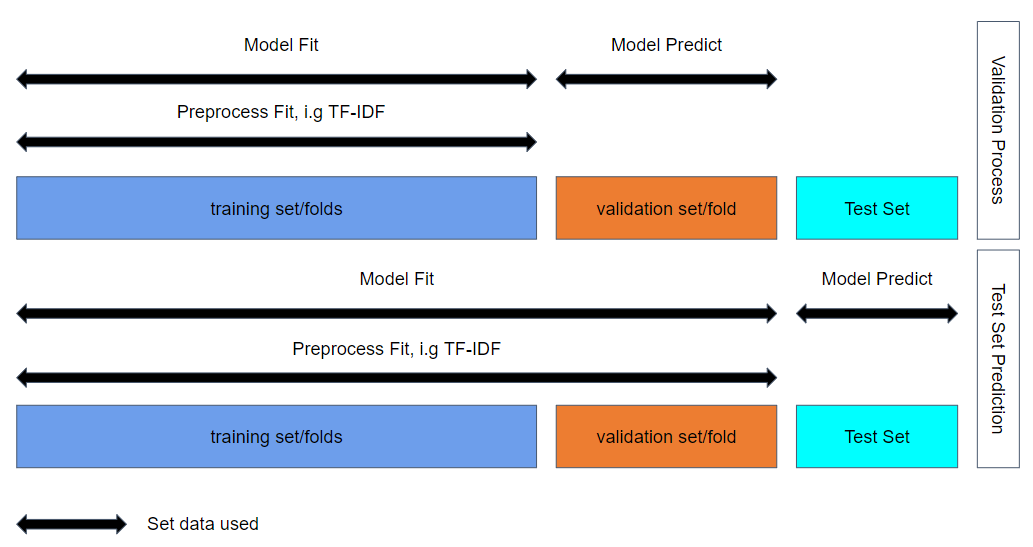

### Hyperparameter Tuning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
tf_idf_prep = TfidfVectorizer()
model = LogisticRegression()
pipe = Pipeline([('preprocess',tf_idf_prep),('model',model)])

param_grid = {'model__C':[0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv = 5)

In [ ]:
grid.fit(text_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [ ]:
print('best score', grid.best_score_)

best score 0.9770306277397358


In [ ]:
grid.best_estimator_.fit(text_train, y_train)
y_pred_tf_idf = grid.best_estimator_.predict(text_test)

### Result

BEFORE

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1198
           1       0.98      0.86      0.92       195

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



AFTER

In [ ]:
print(classification_report(y_test,y_pred_tf_idf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1198
           1       0.94      0.88      0.91       195

    accuracy                           0.98      1393
   macro avg       0.96      0.94      0.95      1393
weighted avg       0.98      0.98      0.98      1393



# 